In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#salary vs birthplace - CG - Done
#salary vs pts per game - CG - Done
#salary vs NHL GWG - CB - Done
#salary vs Age - CB - Done
#salary vs Penalties - JW - Done
#salary vs overall draft - JW - Done

In [3]:
#read in the csv database 
nhl_df = pd.read_csv("nhlstats.csv", encoding='ISO-8859-1',error_bad_lines=False,)

In [4]:
len(nhl_df)

874

In [5]:
#remove RFA players
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [6]:
#drop NaN's
ufa_df = ufa_df[ufa_df['Status'].notnull()]
len(ufa_df)

474

In [7]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,Game Stars 1st,2nd,3rd,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UFA,575000,575000
1,8471716,31833,30,Muskegon,MI,USA,USA,74,218,2005.0,...,0.0,0.0,1.0,18.0,"Lower body, Knee",932926.83,NTC,UFA,5500000,4250000
4,8475844,33724,25,Morristown,NJ,USA,USA,72,202,2010.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,UFA,625000,625000
6,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,1.0,0.0,3.0,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000
11,8473573,32287,29,Yaroslavl,NaN,RUS,RUS,76,198,2006.0,...,2.0,4.0,2.0,18.0,"Upper body, Lower body",998780.49,NMC,UFA,5750000,4550000


In [8]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 871
Columns: 168 entries, Player Id to Cap Hit
dtypes: float64(67), int64(75), object(26)
memory usage: 625.8+ KB


In [9]:
#### Salary vs. Birthplace ####
#Calculate number of players per country and display, so to find out how many players are in each country
ufa_df["Nationality"].value_counts()

CAN    241
USA    132
SWE     38
CZE     16
RUS     11
FIN      9
DNK      5
SVK      5
CHE      4
AUT      3
DEU      2
NOR      2
FRA      2
ITA      1
SVN      1
EST      1
HRV      1
Name: Nationality, dtype: int64

In [10]:
country_count = pd.DataFrame(ufa_df['Nationality'].value_counts()).reset_index()
country_count.rename(columns = {"index":"Nationality","Nationality":"Countryman"}, inplace = True)

In [11]:
ufa_df = pd.merge(ufa_df, country_count, on="Nationality")
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,2nd,3rd,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Countryman
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UFA,575000,575000,241
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,0.0,3.0,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,241
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,3.0,1.0,NaN,NaN,NaN,NaN,UFA,3700000,3300000,241
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,1.0,0.0,NaN,NaN,NaN,NaN,UFA,800000,750000,241
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,1.0,1.0,8.0,Lower body,536585.37,NaN,UFA,5000000,5500000,241


In [12]:
ufa_df["Country Code"] = ufa_df["Nationality"]

In [13]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,3rd,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Countryman,Country Code
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,NaN,UFA,575000,575000,241,CAN
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,3.0,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,241,CAN
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,1.0,NaN,NaN,NaN,NaN,UFA,3700000,3300000,241,CAN
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,0.0,NaN,NaN,NaN,NaN,UFA,800000,750000,241,CAN
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,1.0,8.0,Lower body,536585.37,NaN,UFA,5000000,5500000,241,CAN


In [14]:
#If country is represented by less than or equal to 5 players, then give it a Country Code of "OTH"
ufa_df.loc[ufa_df['Countryman'] <= 5, 'Country Code'] = "OTH"

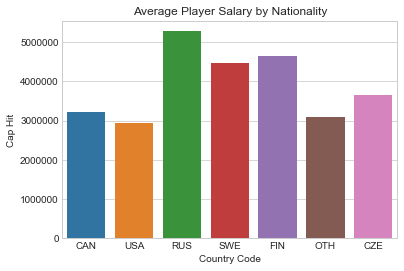

In [15]:
#Display chart (Salary to Country)
sns.set_style("whitegrid")
chart1 = sns.barplot(x = "Country Code", y = "Cap Hit", data = ufa_df, ci = 0)
plt.title("Average Player Salary by Nationality")
plt.show()

In [16]:
#add column for points per game, calculate points per game, and fill cells with answer
ufa_df["Points per Game"] = round(ufa_df["Points"] / ufa_df["GP"],3)

In [17]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Countryman,Country Code,Points per Game
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,UFA,575000,575000,241,CAN,0.000
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,241,CAN,0.159
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,NaN,NaN,NaN,UFA,3700000,3300000,241,CAN,0.683
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,NaN,NaN,NaN,UFA,800000,750000,241,CAN,0.217
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,8.0,Lower body,536585.37,NaN,UFA,5000000,5500000,241,CAN,0.514


In [18]:
ufa_df["FWD/DEF"] = ufa_df["Position"]

In [19]:
replace_position = {"D": "D",
                    "C": "F",
                    "RW": "F",
                    "LW": "F",
                    "C/LW": "F",
                    "LW/C": "F",
                    "C/RW": "F",
                    "RW/C": "F",
                    "LW/RW": "F",
                    "RW/LW": "F",
                    "C/LW/RW": "F",
                    "C/RW/LW": "F",
                    "LW/C/RW": "F",
                    "LW/RW/C": "F",
                    "RW/C/LW": "F",
                    "RW/LW/C": "F",
                    "D/RW": "D",
                    "RW/D": "D",
                    "D/LW": "D",
                    "LW/D": "D",
                    "C/D": "D",
                    "D/C": "D",
                    "C/LW/C":"F"}
ufa_df
ufa_df.loc[:,"FWD/DEF"] = ufa_df["FWD/DEF"].map(replace_position)

In [20]:
#confirm the above
ufa_df["FWD/DEF"].value_counts()

F    299
D    175
Name: FWD/DEF, dtype: int64

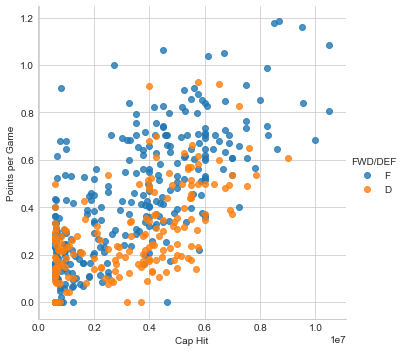

In [21]:
#If to look at by team, then we need to drop the slashes "DAL/ANA" to 'ANA'
#Plot the scatterplot 
sns.lmplot(x = "Cap Hit", y = "Points per Game", data = ufa_df, hue="FWD/DEF", fit_reg=False)
plt.show()

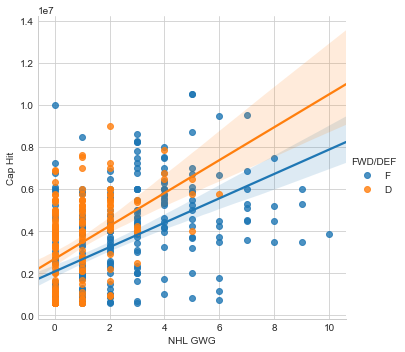

In [22]:
#Create scatterplot for game winning goals to salary
sns.lmplot(x = "NHL GWG", y = "Cap Hit", data = ufa_df, hue="FWD/DEF")
plt.show()

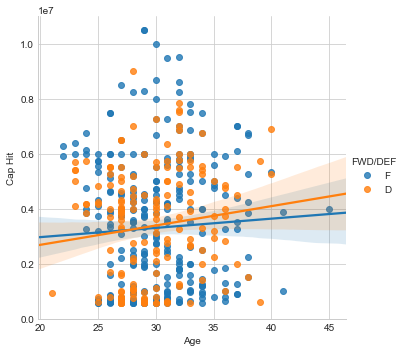

In [30]:
#Create scatterplot for age to salary
sns.lmplot(x = "Age", y = "Cap Hit", data = ufa_df, hue="FWD/DEF")
plt.show()

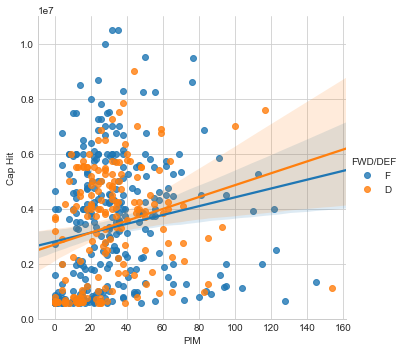

In [24]:
#Create scatterplot for penalties to salary
sns.lmplot(x = "PIM", y = "Cap Hit", data = ufa_df, hue="FWD/DEF")
plt.show()

In [25]:
list(ufa_df)

['Player Id',
 'Year Born',
 'Age',
 'NHL City',
 'Pr/St',
 'Nationality',
 'NHL Nat',
 'NHL Ht',
 'NHL Wt',
 'NHL DftYr',
 'NHL DftRd',
 'NHL Ovrl',
 'NHL Hand',
 'Last Name',
 'First Name',
 'Position',
 'Team',
 'GP',
 'Goals',
 'Assists',
 'Assist 1',
 'Assist 2',
 'Points',
 'PlusMinus',
 'EvenS PlusMinus',
 'PIM',
 'Shifts',
 'TOI',
 'CH TOI',
 'HR TOI/GP',
 'TOI/GP',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'Focused on Goals F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'CH iCF',
 'HR iCF',
 'CH iFF',
 'CH iSF',
 'HR iSF',
 'NHL iSF',
 'CH ixG',
 'CH iSCF',
 'CH iRB',
 'CH iRS',
 'iDS',
 'NHL sDist',
 'CH sDist',
 'RV Pass',
 'NHL iHF',
 'CH iHF',
 'CH iHA',
 'iHDf',
 'NHL iMiss',
 'NHL iGVA',
 'NHL iTKA',
 'NHL iBLK',
 'CH iGVA',
 'CH iTKA',
 'CH iBLK',
 'BLK%',
 'NHL iFOW',
 'NHL iFOL',
 'CH iFOW',
 'CH iFOL',
 'FO%',
 '%FOT',
 'NHL dzFOW',
 'NHL dzFOL',
 'NHL nzFOW',
 'NHL nzFOL',
 'NHL ozFOW',
 'NHL ozFOL',
 'NHL FOW.Up',
 'NHL FOL.Up',
 'NHL FOW.Down',
 'NHL FOL.Down',
 

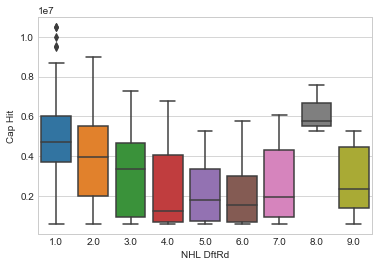

In [26]:
#Create scatterplot for salary to overall draft
sns.boxplot(x = "NHL DftRd", y = "Cap Hit", data = ufa_df)
plt.show()